In [17]:
pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


Características seleccionadas para el modelo (X):
   Year  Present_Price  Kms_Driven  Owner
0  2014           5.59       27000      0
1  2013           9.54       43000      0
2  2017           9.85        6900      0
3  2011           4.15        5200      0
4  2014           6.87       42450      0

Objetivo (y) - Pre

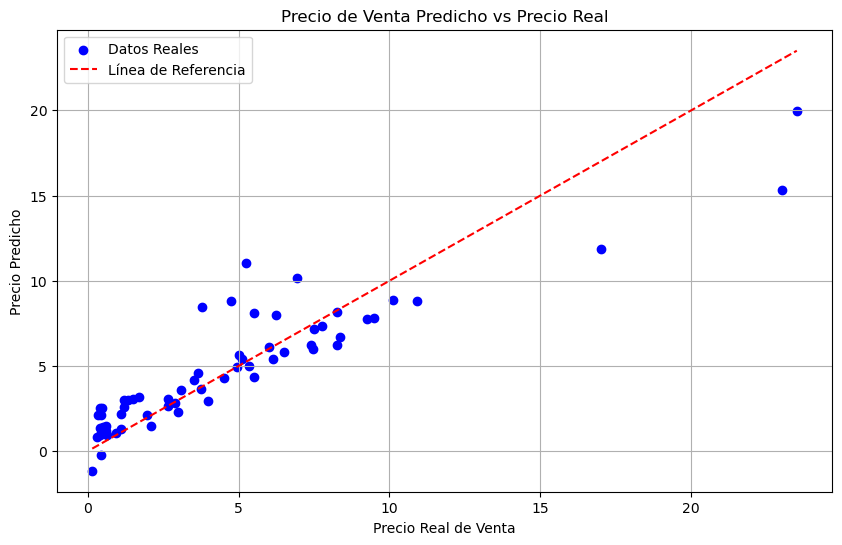

Score del modelo (R^2): 0.8210351448082289

El R^2 indica qué tan bien se ajusta el modelo a los datos. Un valor de 1 indica un ajuste perfecto, mientras que un valor de 0 indica que el modelo no explica nada de la variabilidad de los datos.

Nuevos valores para predicción:
   Year  Present_Price  Kms_Driven  Owner
0  2022         800000       20000      1
1  2021         700000       30000      0

Realizando predicciones...

Predicciones para nuevos automóviles:
Predicción 1: 412865.76 USD
Predicción 2: 361258.65 USD

Las predicciones representan el precio estimado de venta de los automóviles según los atributos proporcionados.


In [27]:
# Cargar el dataset
df = pd.read_csv('C:\\Users\\BRAYAN\\car.csv')

# Ver las primeras filas del dataset para inspeccionar la estructura
print("Primeras filas del dataset:")
print(df.head())
print("\n")

# Seleccionar las características (atributos) y el objetivo (precio de venta)
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner']]  
y = df['Selling_Price']

print("Características seleccionadas para el modelo (X):")
print(X.head())
print("\nObjetivo (y) - Precio de venta:")
print(y.head())
print("\n")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")
print("\n")

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo.fit(X_train, y_train)
print("Modelo ajustado a los datos de entrenamiento.\n")

# Coeficientes de la regresión
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_       # Pendientes

# Mostrar los coeficientes
print(f"Intercepto (β0): {beta_0}")
print(f"Coeficientes (β1): {beta_1}\n")

# Predecir los precios para los datos de prueba
y_pred = modelo.predict(X_test)

# Graficar los resultados: precios reales vs precios predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', marker='o', label='Datos Reales')

# Añadir una línea de referencia
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Línea de Referencia')

# Añadir etiquetas y título
plt.xlabel('Precio Real de Venta')
plt.ylabel('Precio Predicho')
plt.title('Precio de Venta Predicho vs Precio Real')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

# Mostrar el score del modelo (R^2)
r2_score = modelo.score(X_test, y_test)
print(f"Score del modelo (R^2): {r2_score}\n")
print("El R^2 indica qué tan bien se ajusta el modelo a los datos. Un valor de 1 indica un ajuste perfecto, mientras que un valor de 0 indica que el modelo no explica nada de la variabilidad de los datos.\n")

# Predecir precios para nuevos automóviles
# (ejemplo de nuevo valor: Año, Precio Presente, Kms Conducidos, Dueños)
nuevos_valores = pd.DataFrame({
    'Year': [2022, 2021],
    'Present_Price': [800000, 700000],
    'Kms_Driven': [20000, 30000],
    'Owner': [1, 0]
})

print("Nuevos valores para predicción:")
print(nuevos_valores)
print("\nRealizando predicciones...\n")

# Realizar la predicción
predicciones = modelo.predict(nuevos_valores)

# Mostrar las predicciones
print("Predicciones para nuevos automóviles:")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i + 1}: {pred:.2f} USD")
print("\nLas predicciones representan el precio estimado de venta de los automóviles según los atributos proporcionados.")